# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [2]:
# Part 1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('pierce_county_house_sales.csv')
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [7]:
df.describe()

,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,bedrooms,bathrooms
count,1.681400e+04,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000,16814.000000
mean,4.612332e+05,1879.941953,24.945878,167.852861,364.425122,38.298501,0.889021,1.558285,1980.469252,3.277983,2.317176
std,2.360833e+05,760.419008,102.066417,429.065832,286.454018,164.691471,0.596731,0.512055,33.339025,0.891240,0.827956
min,2.000000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1880.000000,0.000000,0.000000
25%,3.480000e+05,1320.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1959.000000,3.000000,2.000000
50%,4.165000e+05,1774.000000,0.000000,0.000000,420.000000,0.000000,1.000000,2.000000,1990.000000,3.000000,2.000000
75%,5.238065e+05,2352.000000,0.000000,0.000000,528.000000,0.000000,1.000000,2.000000,2006.000000,4.000000,3.000000
max,6.130000e+06,9510.000000,1212.000000,4000.000000,2816.000000,3664.000000,5.000000,3.000000,2021.000000,25.000000,8.000000


In [10]:
print(df.dtypes)

sale_date                      object
sale_price                      int64
house_square_feet               int64
attic_finished_square_feet      int64
basement_square_feet            int64
attached_garage_square_feet     int64
detached_garage_square_feet     int64
fireplaces                      int64
hvac_description               object
exterior                       object
interior                       object
stories                         int64
roof_cover                     object
year_built                      int64
bedrooms                        int64
bathrooms                       int64
waterfront_type                object
view_quality                   object
utility_sewer                  object
dtype: object


In [11]:
# cleaning data

df['sale_date'] = pd.to_datetime(df['sale_date']) # changing to datetime objects

print("\nMissing Values:\n", df.isnull().sum()) # checking for missing values




Missing Values:
 sale_date                          0
sale_price                         0
house_square_feet                  0
attic_finished_square_feet         0
basement_square_feet               0
attached_garage_square_feet        0
detached_garage_square_feet        0
fireplaces                         0
hvac_description                   7
exterior                           1
interior                           7
stories                            0
roof_cover                         8
year_built                         0
bedrooms                           0
bathrooms                          0
waterfront_type                16261
view_quality                   15895
utility_sewer                      0
dtype: int64


In [13]:
for col in df.select_dtypes(include = ['number']):
    df[col] = df[col].fillna(0)

for col in df.select_dtypes(include = ['object', 'category']):
    df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
df.duplicated().sum()
df = df.drop_duplicates()

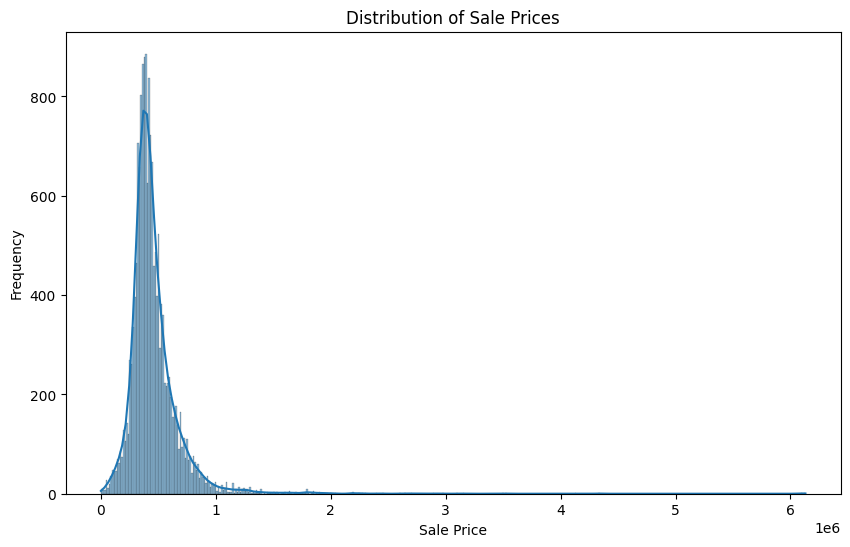

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sale_price'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

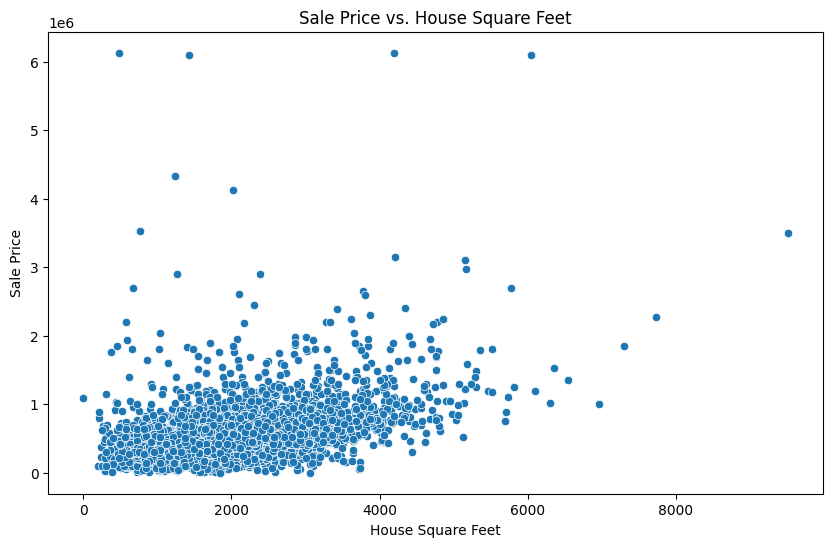

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='house_square_feet', y='sale_price', data=df)
plt.title('Sale Price vs. House Square Feet')
plt.xlabel('House Square Feet')
plt.ylabel('Sale Price')
plt.show()

In [24]:
# Part 2
categorical_cols = ['hvac_description', 'exterior', 'interior', 'roof_cover', 'waterfront_type', 'view_quality', 'utility_sewer']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [45]:
# Part 3
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

X_train = train.df.drop(columns=['sale_price'])
y_train = train_df['sale_price']
X_test = test_df.drop(columns=['sale_price'])
y_test = test_df['sale_price']


In [46]:
# Part 4
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)
print("Test RMSE:", test_rmse)
print("Test R^2:", test_r2)


Training RMSE: 166896.27402086192
Training R^2: 0.5143815851035136
Test RMSE: 158319.86039275437
Test R^2: 0.49150068552762016


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
#Part 5
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

complex_model = LinearRegression()
complex_model.fit(X_train_poly, y_train_log)

y_train_log_pred = complex_model.predict(X_train_poly)
y_test_log_pred = complex_model.predict(X_test_poly)

train_rmse_complex = mean_squared_error(y_train, np.exp(y_train_log_pred), squared=False)
test_rmse_complex = mean_squared_error(y_test, np.exp(y_test_log_pred), squared=False)
train_r2_complex = r2_score(y_train, np.exp(y_train_log_pred))
test_r2_complex = r2_score(y_test, np.exp(y_test_log_pred))

print("Complex Model Training RMSE:", train_rmse_complex)
print("Complex Model Training R^2:", train_r2_complex)
print("Complex Model Test RMSE:", test_rmse_complex)
print("Complex Model Test R^2:", test_r2_complex)


Complex Model Training RMSE: 139094.2625834816
Complex Model Training R^2: 0.662696927163857
Complex Model Test RMSE: 12209171528839.771
Complex Model Test R^2: -3024070877292764.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Part 6
It seems like the complex model is overfitting the training data because of excessive complexity. The simple model generalizes better on the test set. The complex model performs worse on the test set, which shows that added complexity doesn't lead to better real-world performance.